In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.shape

(891, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

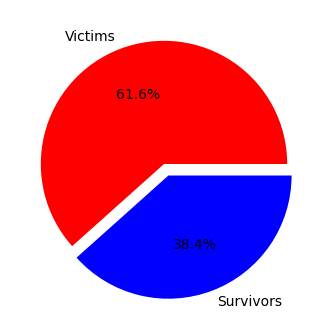

In [5]:
f, ax = plt.subplots(figsize=(6, 4))

labels = ['Victims', 'Survivors']
colors = ['red', 'blue']

train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', labels=labels, colors=colors, shadow=False)

plt.ylabel('')
plt.show()

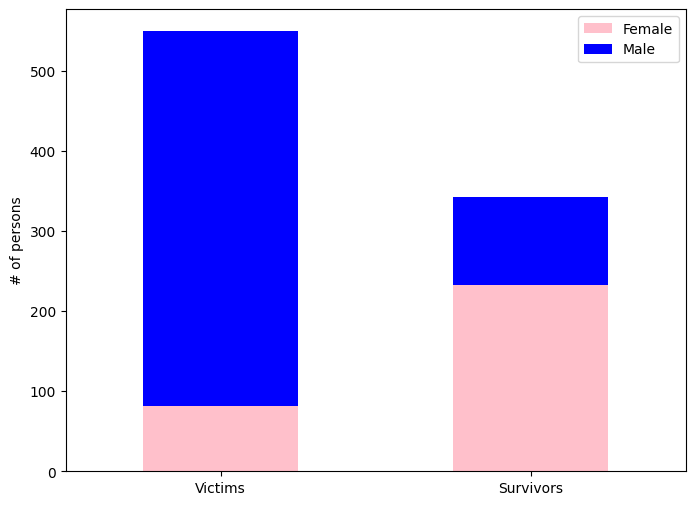

In [6]:
survival_sex = train.groupby(['Survived', 'Sex']).size().unstack()

labels = ['Female', 'Male']
colors = ['pink', 'blue']

ax = survival_sex.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

ax.set_ylabel('# of persons')
ax.set_xlabel('')

ax.set_xticklabels(['Victims', 'Survivors'], rotation=0)

plt.legend(labels)
plt.show()

In [7]:
combined = [test, train]

for df in combined:
    df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
    print(df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch     Fare Embarked  
0  34.5      0      0   7.8292        Q  
1  47.0      1      0   7.0000        S  
2  62.0      0      0   9.6875        Q  
3  27.0      0      0   8.6625        S  
4  22.0      1      1  12.2875        S  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Na

In [8]:
train['Embarked'].fillna('S', inplace=True)

In [9]:
bins = [-np.inf, 0, 15, 25, 65, np.inf]
labels = ['Unknown', 'Child', 'Youth', 'Adult', 'Senior']

for df in combined:
    df['Age Group'] = pd.cut(df['Age'].fillna(-1), bins, labels=labels)
    print(df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch     Fare Embarked Age Group  
0  34.5      0      0   7.8292        Q     Adult  
1  47.0      1      0   7.0000        S     Adult  
2  62.0      0      0   9.6875        Q     Adult  
3  27.0      0      0   8.6625        S     Adult  
4  22.0      1      1  12.2875        S     Youth  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0   

In [10]:
title_mapping = {'Mr': 1, 
                 'Miss': 2, 
                 'Mrs': 3, 
                 'Master': 4, 
                 'Royal': 5, 
                 'Rare': 6}

replacement = {
    'Lady': 'Rare', 
    'Capt': 'Rare', 
    'Col': 'Rare', 
    'Don': 'Rare', 
    'Dr': 'Rare', 
    'Major': 'Rare', 
    'Rev': 'Rare', 
    'Jonkheer': 'Rare', 
    'Dona': 'Rare', 
    'Countess': 'Royal', 
    'Sir': 'Royal',
    'Mlle': 'Miss', 
    'Ms': 'Miss', 
    'Mme': 'Mrs'
}

replacement = {key: title_mapping[val] for key, val in replacement.items()}

for df in combined:
    df['Title'] = (df.Name
                     .str.extract(' ([A-Za-z]+)\.', expand=False)
                     .replace(replacement)
                     .map(title_mapping)
                     .fillna(0))

In [11]:
age_title_mapping = {1: 'Youth', 
                     2: 'Youth',
                     3: 'Adult', 
                     4: 'Child', 
                     5: 'Adult', 
                     6: 'Adult'}

for df in combined:
    unknown_ages = df['Age Group'] == 'Unknown'
    df.loc[unknown_ages, 'Age Group'] = df.loc[unknown_ages, 'Title'].map(age_title_mapping)

In [12]:
age_mapping = {'Child': 1, 
               'Youth': 2, 
               'Adult': 3,
               'Senior': 4}

for df in combined:
    df['Age Group'] = df['Age Group'].map(age_mapping)
    df.drop(['Age'], axis=1, inplace=True)

In [13]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age Group      1
Title          0
dtype: int64

In [14]:
train.dropna(subset=['Age Group'], inplace=True)

In [15]:
train.drop(['Name'], axis=1, inplace=True)

print(df.head())

   PassengerId  Survived  Pclass     Sex  SibSp  Parch     Fare Embarked  \
0            1         0       3    male      1      0   7.2500        S   
1            2         1       1  female      1      0  71.2833        C   
2            3         1       3  female      0      0   7.9250        S   
3            4         1       1  female      1      0  53.1000        S   
4            5         0       3    male      0      0   8.0500        S   

   Age Group  Title  
0        2.0    1.0  
1        3.0    3.0  
2        3.0    2.0  
3        3.0    3.0  
4        3.0    1.0  


In [16]:
sex_mapping = {'female': 0, 'male': 1}
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}

for df in combined:
    df['Sex'] = df['Sex'].map(sex_mapping)
    df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [17]:
for df in combined:
    df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))

for df in combined:
    df['Fare Band'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])
    df.drop(['Fare'], axis=1, inplace=True)

In [18]:
print(train.head())

   PassengerId  Survived  Pclass  Sex  SibSp  Parch  Embarked  Age Group  \
0            1         0       3    1      1      0         1        2.0   
1            2         1       1    0      1      0         2        3.0   
2            3         1       3    0      0      0         1        3.0   
3            4         1       1    0      1      0         1        3.0   
4            5         0       3    1      0      0         1        3.0   

   Title Fare Band  
0    1.0         1  
1    3.0         4  
2    2.0         2  
3    3.0         4  
4    1.0         2  


In [19]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

accuracy_rf = round(accuracy_score(y_pred, y_val) * 100, 2)
print(accuracy_rf)

81.46
